<a href="https://colab.research.google.com/github/antrecord/AI_python/blob/main/%D0%9F%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.neighbors import NearestNeighbors
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Читаем датасет
# Ссылка на датасет: https://www.kaggle.com/datasets/tarekmuhammed/telecom-customers
dataset = pd.read_csv('/content/Telecom.csv', sep=',', encoding='cp1252')

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Выводим информацию о датасете
dataset.info()
# customerID - это уникальное значение, можем его убрать
dataset = dataset.drop('customerID', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Категориальные значения классов
yvals = dataset['Churn']
# Столбцы
vals = dataset['Churn'].unique()
# Удаляем пропуски
dataset = dataset.replace(' ', np.NaN)
dataset = dataset.dropna()
# Заменяем категориальные переменные
dataset = dataset.replace('Yes', 1).replace('No', 0).replace('Female', 0).replace('Male', 1).replace('No internet service', -1).replace('No phone service', -1)
dataset["Contract"] = dataset["Contract"].astype('category')
dataset["Contract_ind"] = dataset["Contract"].cat.codes
dataset["PaymentMethod"] = dataset["PaymentMethod"].astype('category')
dataset["PaymentMethod_ind"] = dataset["PaymentMethod"].cat.codes
dataset["InternetService"] = dataset["InternetService"].astype('category')
dataset["InternetService_ind"] = dataset["InternetService"].cat.codes
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)

<ipython-input-4-6ed1fb80b1e8>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace('Yes', 1).replace('No', 0).replace('Female', 0).replace('Male', 1).replace('No internet service', -1).replace('No phone service', -1)


In [ ]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               7032 non-null   int64   
 1   SeniorCitizen        7032 non-null   int64   
 2   Partner              7032 non-null   int64   
 3   Dependents           7032 non-null   int64   
 4   tenure               7032 non-null   int64   
 5   PhoneService         7032 non-null   int64   
 6   MultipleLines        7032 non-null   int64   
 7   InternetService      7032 non-null   category
 8   OnlineSecurity       7032 non-null   int64   
 9   OnlineBackup         7032 non-null   int64   
 10  DeviceProtection     7032 non-null   int64   
 11  TechSupport          7032 non-null   int64   
 12  StreamingTV          7032 non-null   int64   
 13  StreamingMovies      7032 non-null   int64   
 14  Contract             7032 non-null   category
 15  PaperlessBilling     7032 

In [ ]:
# Датасет без категориальных переменных
df= (dataset.drop(['InternetService', 'Contract', 'PaymentMethod', 'Churn'], axis=1)).copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_ind,PaymentMethod_ind,InternetService_ind
0,0,0,1,0,1,0,-1,0,1,0,0,0,0,1,29.85,29.85,0,2,1
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,1,3,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,0,3,1
3,1,0,0,0,45,0,-1,1,0,1,1,0,0,0,42.30,1840.75,1,0,1
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,2,2


In [ ]:
X = df
y = dataset['Churn']

#RCA

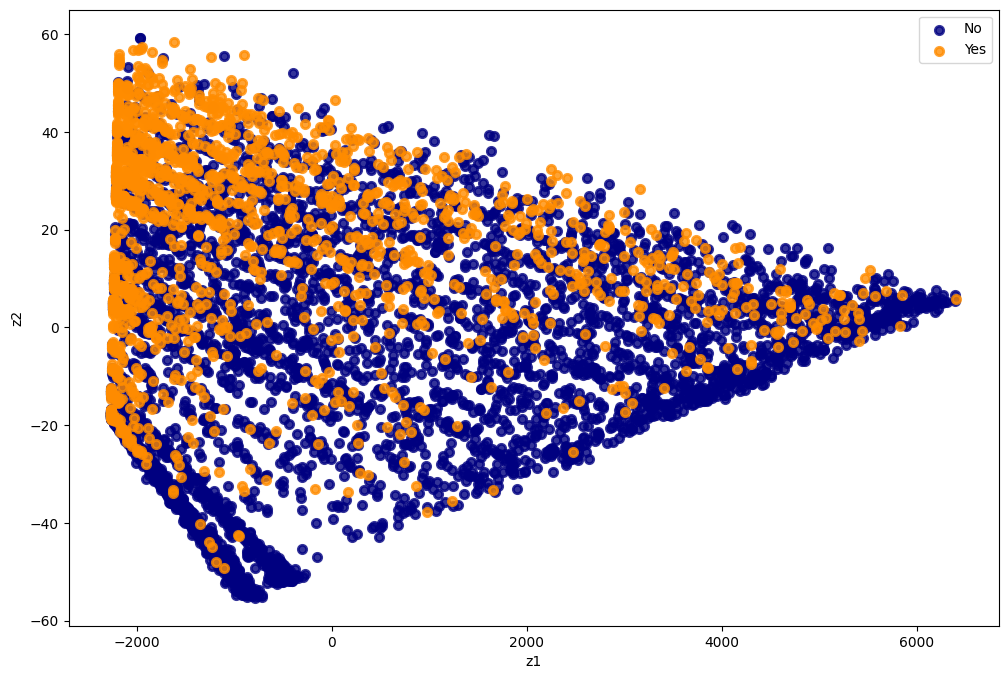

In [ ]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], X.columns):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
# Доля вариаций, объясняемых важными компонентами
pca.explained_variance_ratio_

array([9.99860133e-01, 1.22353916e-04])

#ICA

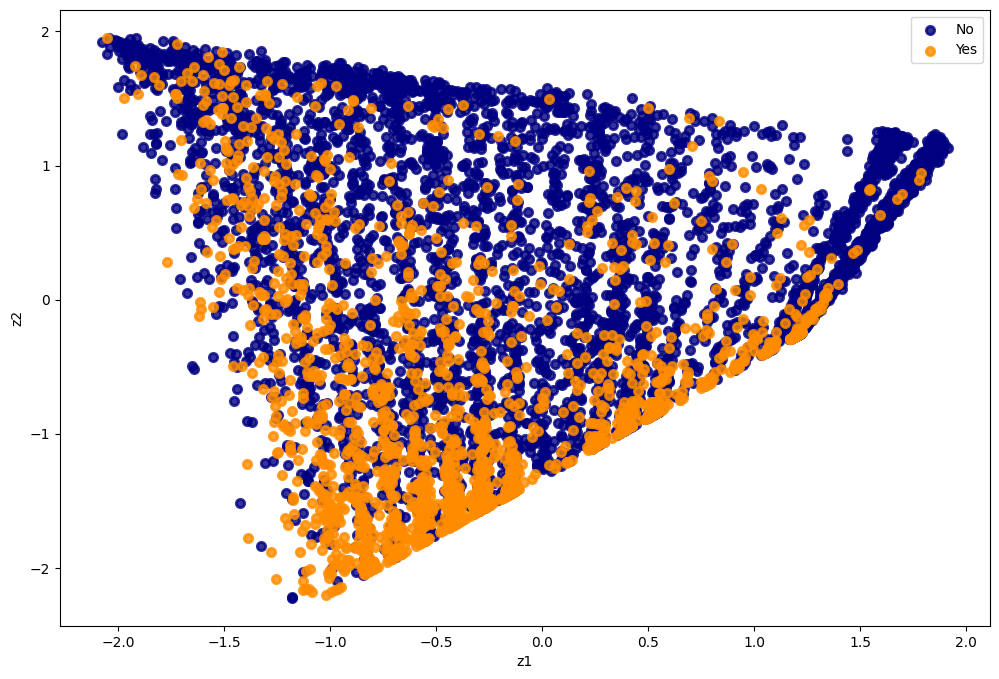

In [ ]:
fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], X.columns):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
# Посмотрим веса
fast_ica.mixing_

array([[ 6.37161767e-03,  5.73789352e-03],
       [-7.87792844e-02, -1.98456070e-02],
       [-4.31540218e-02,  1.75385312e-01],
       [ 5.32836131e-02,  8.74332098e-02],
       [-5.27660138e+00,  2.24852293e+01],
       [-7.16321686e-02, -1.93134567e-02],
       [-3.08395009e-01,  7.96161174e-02],
       [-4.47298384e-01,  5.70113977e-02],
       [-5.23642246e-01,  6.36765762e-02],
       [-5.41575042e-01,  5.55440910e-02],
       [-4.67249375e-01,  5.24003125e-02],
       [-6.15822010e-01, -7.58836977e-03],
       [-6.15481921e-01, -3.92065292e-03],
       [-1.69983217e-01, -4.81279614e-02],
       [-2.98024098e+01, -3.96333389e-01],
       [-1.51211517e+03,  1.68849916e+03],
       [ 7.65404081e-02,  5.72013551e-01],
       [ 1.82500248e-01, -3.10285269e-01],
       [-6.95109596e-01, -1.74939480e-01]])

#KernelRCA

Дисперсии для обучающей и тестовой выборок:
0.03031984444167017
0.028891581858811362


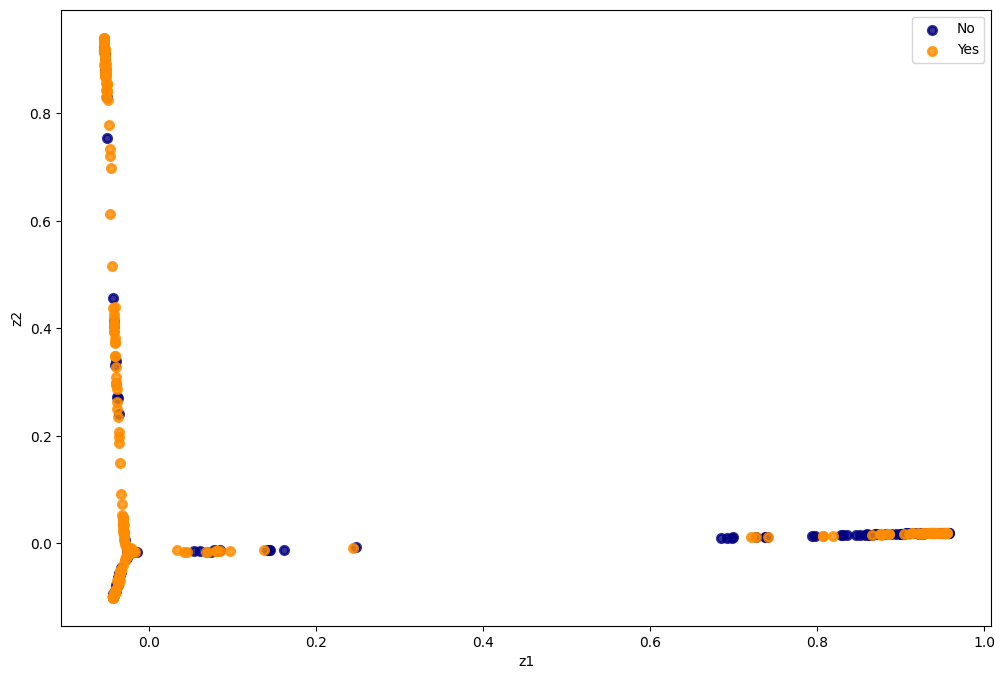

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_train_new = rbf_pca.fit_transform(X_train)
X_test_new = rbf_pca.transform(X_test)

print('Дисперсии для обучающей и тестовой выборок:')
print(np.var(X_train_new, axis=0).sum())
print(np.var(X_test_new, axis=0).sum())

plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(
        X_train_new[y_train == i, 0], X_train_new[y_train == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#tSNE

In [ ]:
for i in [5, 10, 30, 50, 100]:
  tsne = TSNE(n_components=2, perplexity=i, n_iter=2000, random_state=12)
  X_new = tsne.fit_transform(X)
  print('perplexity = ', i)
  print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)

perplexity =  5
Kullback-Leibler divergence after optimization:  0.6570632457733154
perplexity =  10
Kullback-Leibler divergence after optimization:  0.5595724582672119
perplexity =  30
Kullback-Leibler divergence after optimization:  0.42509719729423523
perplexity =  50
Kullback-Leibler divergence after optimization:  0.3655998110771179
perplexity =  100
Kullback-Leibler divergence after optimization:  0.2918197214603424


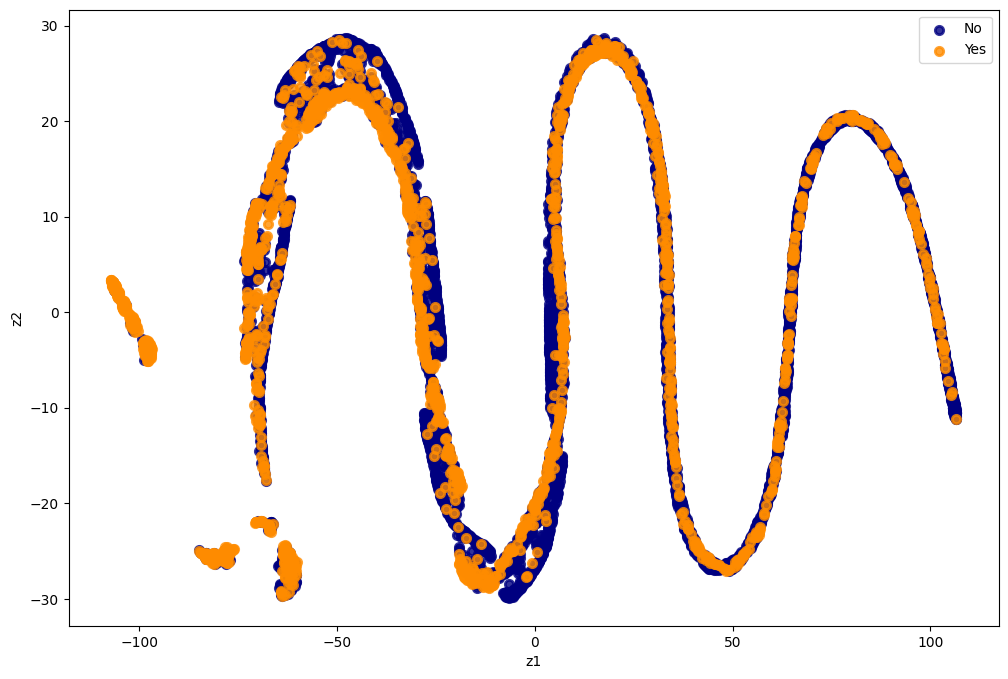

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#DBSCAN

In [ ]:
dbscan_cluster1 = DBSCAN(eps = 0.28, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 18
Estimated no. of noise points: 6913
v_measure = 0.011241172613898325


In [ ]:
min_samples = 20

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'manhattan')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

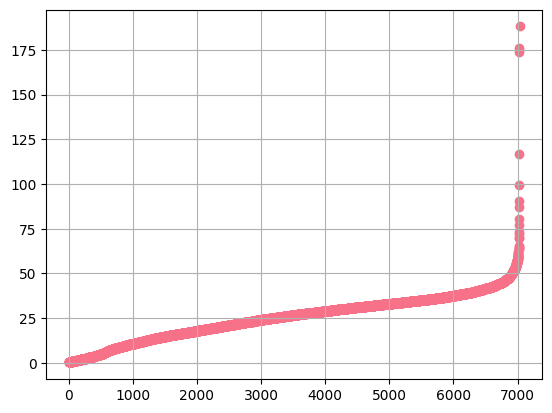

In [ ]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 50, min_samples = min_samples)

In [ ]:
pred = dbscan.fit_predict(X)

In [ ]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 57
v_measure = 0.008060064138366605


In [ ]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]

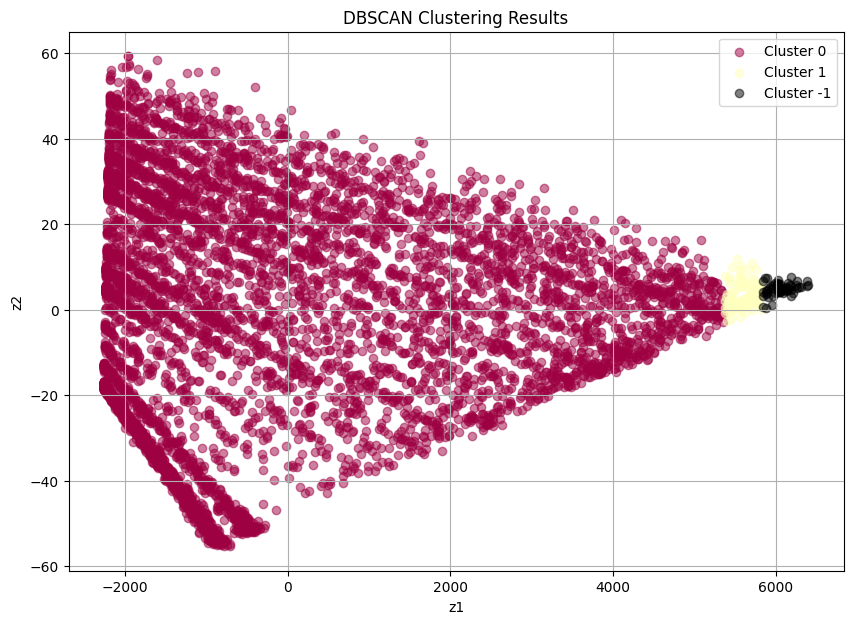

In [ ]:
# Применяем PCA для снижения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация результатов
plt.figure(figsize=(10, 7))
unique_labels = set(pred)

# Задаем цвета для каждого кластера
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:  # Если это шум
        col = 'k'  # Черный для выбросов
    class_member_mask = (pred == k)

    # Визуализируем точки
    plt.scatter(X_pca[class_member_mask, 0], X_pca[class_member_mask, 1],
                color=col, label=f'Cluster {k}', alpha=0.5)

plt.title('DBSCAN Clustering Results')
plt.xlabel("z1")
plt.ylabel("z2")
plt.legend(loc='best')
plt.grid()
plt.show()